Дана система линейных алгебраических уравнений специального вида

$A_kU_{k - 1} + B_kU_k + C_kU_{k+1} = F_k \quad (1) \\ k = \overline{1, N} \\ A_1 = C_N = 0$

Здесь $A_k, B_k, C_k,\ k = \overline{1, N}$ - заданные коэффициенты системы, которые можно рассматривать как три диагонали матрицы системы, а остальные коэффициенты системы равны нулю; $F_k,\ k = \overline{1, N}$ - правые части,
$U_k,\ k = \overline{1, N}$ - искомые значения, решения системы (1).

Выразим из первого уравнения системы (1) $U_1$ в виде

$\displaystyle U_1 = -\frac{C_1}{B_1}U_2 + \frac{F_1}{B_1} \quad (2)$

Введем обозначения $\displaystyle\alpha_2 = -\frac{C_1}{B_1},\ \beta_2 = \frac{F_1}{B_1} \quad (3)$

Тогда соотношение (2) перепишется следующим образом $U_1 = \alpha_2U_2 + \beta_2 \quad (4)$

Предположим, что $U_{k-1} = \alpha_kU_k + \beta_k \quad (5)$

Исключим из $k$-го уравнения системы (1) $U_{k−1}$, подставив соотношение (5)
в $k$-ое уравнение, $A_k(α_kU_k + β_k) + B_kU_k + C_kU_{k+1} = F_k$, выразим из него
$U_k$:

$\displaystyle U_k = -\frac{C_k}{B_k + A_k\alpha_k}U_{k+1} + \frac{F_k - A_k\beta_k}{B_k + A_k\alpha_k}$

Отсюда видно, что введя обозначения:

$\displaystyle \beta_{k+1} = \frac{F_k - A_k\beta_k}{B_k + A_k\alpha_k}; \quad a_{k+1} = -\frac{C_k}{B_k + A_k\alpha_k} \quad (6)$

Мы сведем $k$-ое уравнение к двучленному виду: $U_k = \alpha_{k + 1}U_{k+1} + \beta_{k+1} \quad (7)$

Таким образом, мы показали, что для каждого $k = \overline{1, N}$ $k$-ое уравнение системы (1) может быть приведено к виду (7), где коэффициенты
$α_k+1$, $β_k+1$ могут быть вычислены по формулам (6). Эти коэффициенты
называют прогоночными, а их вычисление называют прямым ходом прогонки.

В преобразованиях, описанных выше, не участвовало $N$-ое уравнение
системы (1). Это уравнение и соотношение (7) при $k = N − 1$:

$\begin{cases}
A_NU_{N-1} + B_NU_N = F_N, \\
U_{N-1} = \alpha_NU_N + \beta_N
\end{cases}$

Можно использовать для определения $U_N$:

$\displaystyle U_N = \frac{F_N - A_N\beta_N}{A_N\alpha_N + B_N}$

Все остальные $U_k,\ k = \overline{N-1, 1}$, определяются по формуле (7).
Вычисление $U_k$ является обратным ходом прогонки. Этот метод называют монотонной правой прогонкой, поскольку сведение трехчленной (или,
говорят, трехдиагональной) системы линейных алгебраических уравнений
к двучленному виду проводится по возрастанию номеров уравнений, начиная с первого, что совершенно не принципиально, и можно производить
исключение одного неизвестного в каждом уравнении по убыванию номеров, тогда получим формулы монотонной левой прогонки.

In [2]:
import numpy as np

def thomas_algorithm(A: np.ndarray, B: np.ndarray, C: np.ndarray, F: np.ndarray) -> np.ndarray:
    """
    Решает трехдиагональную систему линейных уравнений методом прогонки (методом Томаса).

    Args:
        A (np.ndarray): Коэффициенты поддиагонали, при этом A[0] не используется или равен 0.
        B (np.ndarray): Коэффициенты главной диагонали.
        C (np.ndarray): Коэффициенты наддиагонали, при этом C[N-1] не используется или равен 0.
        F (np.ndarray): Вектор правой части.

    Returns:
        np.ndarray: Соответсвуюший вектор решений U, удовлетворяющий системе.
    """
    N = len(B)
    alpha = np.zeros(N)
    beta = np.zeros(N)
    U = np.zeros(N)

    if B[0] == 0:
        raise ZeroDivisionError("Нулевой элемент на главной диагонали: B[0] == 0")
    alpha[1] = -C[0] / B[0]
    beta[1] = F[0] / B[0]

    for k in range(1, N - 1):
        denom = B[k] + A[k] * alpha[k]
        if denom == 0:
            raise ZeroDivisionError(f"Деление на ноль при k={k}, знаменатель обращается в ноль.")
        alpha[k + 1] = -C[k] / denom
        beta[k + 1] = (F[k] - A[k] * beta[k]) / denom

    denom = A[N - 1] * alpha[N - 1] + B[N - 1]
    if denom == 0:
        raise ZeroDivisionError("Деление на ноль при вычислении последнего элемента.")
    U[N - 1] = (F[N - 1] - A[N - 1] * beta[N - 1]) / denom

    for k in range(N - 2, -1, -1):
        U[k] = alpha[k + 1] * U[k + 1] + beta[k + 1]

    return U


In [3]:
A = np.array([0, 1, 1], dtype=float)
B = np.array([2, 2, 2], dtype=float)
C = np.array([1, 1, 0], dtype=float)
F = np.array([5, 6, 5], dtype=float)

U = thomas_algorithm(A, B, C, F)
print("Решение системы:", U)

def check_solution(A, B, C, U):
    N = len(U)
    result = np.zeros(N)
    for i in range(N):
        if i > 0:
            result[i] += A[i] * U[i - 1]
        result[i] += B[i] * U[i]
        if i < N - 1:
            result[i] += C[i] * U[i + 1]
    return result

F_computed = check_solution(A, B, C, U)
print("Проверка (A·U ≈ F):", F_computed)
print("Погрешность:", np.abs(F_computed - F))

Решение системы: [2. 1. 2.]
Проверка (A·U ≈ F): [5. 6. 5.]
Погрешность: [0.0000000e+00 8.8817842e-16 0.0000000e+00]


1000 0.0
2000 0.008020162582397461
3000 0.007044076919555664
4000 0.008429765701293945
5000 0.007383584976196289
6000 0.01701188087463379
7000 0.011637449264526367
8000 0.016610383987426758
9000 0.01752495765686035
10000 0.015851736068725586
11000 0.01783895492553711
12000 0.01652693748474121
13000 0.020453214645385742
14000 0.028699159622192383
15000 0.01735520362854004
16000 0.03247690200805664
17000 0.07182788848876953
18000 0.05875873565673828
19000 0.025287389755249023
20000 0.0296630859375
21000 0.03125286102294922
22000 0.04190230369567871
23000 0.03276777267456055
24000 0.03982043266296387
25000 0.04193568229675293
26000 0.0407862663269043
27000 0.05865359306335449
28000 0.05317401885986328
29000 0.04805755615234375
30000 0.04570484161376953
31000 0.06643843650817871
32000 0.0481114387512207
33000 0.05554795265197754
34000 0.046905517578125
35000 0.07161903381347656
36000 0.07543373107910156
37000 0.07512211799621582
38000 0.07421159744262695
39000 0.07431721687316895
40000 0.0

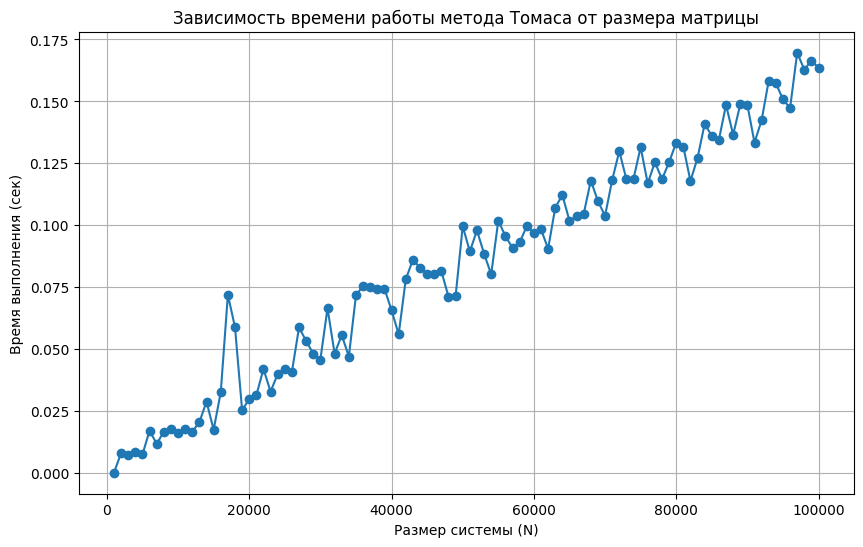

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

sizes = list(range(1000, 100001, 1000))
times = []

for N in sizes:
    A = np.ones(N)
    B = 2 * np.ones(N)
    C = np.ones(N)
    F = np.random.rand(N)
    A[0] = 0
    C[-1] = 0

    start = time.time()
    U = thomas_algorithm(A, B, C, F)
    end = time.time()

    times.append(end - start)
    # print(N, end-start)
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title("Зависимость времени работы метода Томаса от размера матрицы")
plt.xlabel("Размер системы (N)")
plt.ylabel("Время выполнения (сек)")
plt.grid(True)
plt.show()
